# **Optimization** **Methods** **for** **Rosenbrock** **Function**
We will compare three optimization techniques:

#**Armijo Line Search**:

An adaptive step size method that adjusts the step size based on the Armijo condition,
which ensures sufficient decrease in the objective function.
    
# **Golden Section Search**:

A method that finds the optimal step size by iteratively narrowing the search interval using
the golden ratio.
    
# **Constant Alpha**:

A fixed step size method, where the learning rate is constant throughout the optimization process.

# **Importing Libraries**

This cell imports the required libraries for the project:

- `numpy`: Used for numerical computations, such as handling vectors and matrices.
- `matplotlib.pyplot`: Used for plotting and visualizing the optimization paths.
- `math`: Provides mathematical functions such as the square root for the Golden Section Search method.

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import math


# **Define the Rosenbrock Function**

This cell defines the Rosenbrock function, which is commonly used to test optimization algorithms. The function is defined as:

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

This function has a narrow, curved valley, making it challenging for optimization techniques to converge.

In [16]:
def rosenbrock_function(point):
    x, y = point
    # Formula for the Rosenbrock function
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

# **Define the Gradient of the Rosenbrock Function**

This cell defines the gradient of the Rosenbrock function, which is needed for the optimization methods. The gradient is the vector of partial derivatives:

- $$ \frac{\partial f}{\partial x} = -2(1 - x) - 400x(y - x^2) $$
- $$ \frac{\partial f}{\partial y} = 200(y - x^2) $$

The gradient points in the direction of the steepest ascent, and optimization algorithms will use the negative gradient to move toward the minimum.

In [17]:
def rosenbrock_gradient(point):
    x, y = point
    # Partial derivative with respect to x
    df_dx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    # Partial derivative with respect to y
    df_dy = 200 * (y - x ** 2)
    return np.array([df_dx, df_dy])

# **Armijo Line Search Method**

The Armijo Line Search is an adaptive step-size method. It adjusts the learning rate based on the Armijo condition, ensuring sufficient decrease in the objective function at each step.

In this method:
- The initial step size is set to 1.
- The step size is decreased by a factor of `beta` (default 0.7) until the Armijo condition is satisfied.

In [18]:
def armijo_line_search(current_pos, gradient, beta=0.7, sigma=0.1):
    learning_rate = 1.0
    while rosenbrock_function(current_pos - learning_rate * gradient) >rosenbrock_function(current_pos) - sigma * learning_rate * np.dot(gradient, gradient):
        learning_rate *= beta
    return learning_rate

# **Golden Section Search Method**

The Golden Section Search method is used to find the optimal step size. It narrows the search interval using the golden ratio to find the minimum of the Rosenbrock function along the gradient direction.

In this method:
- The interval is initially set between `alpha_low` and `alpha_high` (0 and 1).
- The algorithm iteratively narrows down the interval until it converges to a step size within the specified tolerance (`tol`).

In [19]:
def golden_section_search(current_pos, gradient, tol=1e-5):
    alpha_low, alpha_high = 0, 1
    golden_ratio = (math.sqrt(5) - 1) / 2
    alpha1 = alpha_low + (1 - golden_ratio) * (alpha_high - alpha_low)
    alpha2 = alpha_low + golden_ratio * (alpha_high - alpha_low)

    while abs(alpha_high - alpha_low) > tol:
        if rosenbrock_function(current_pos - alpha1 * gradient) < rosenbrock_function(current_pos - alpha2 * gradient):
            alpha_high = alpha2
            alpha2 = alpha1
            alpha1 = alpha_low + (1 - golden_ratio) * (alpha_high - alpha_low)
        else:
            alpha_low = alpha1
            alpha1 = alpha2
            alpha2 = alpha_low + golden_ratio * (alpha_high - alpha_low)

    return (alpha_low + alpha_high) / 2

# **Constant Alpha Method**

The Constant Alpha method uses a fixed learning rate (step size) throughout the optimization process. This approach does not adapt the learning rate during the optimization and uses a constant value for the learning rate.

In this implementation:
- The learning rate is set to a constant value of `0.001` to ensure better convergence for the Rosenbrock function.

**Run the Optimization Methods and Plot**

This cell executes the three optimization methods (Armijo Line Search, Golden Section Search, and Constant Alpha) starting from the same initial point. It also generates a contour plot of the Rosenbrock function to visualize the optimization paths.

- Each method iterates until the gradient is sufficiently small or the maximum number of iterations is reached.
- The optimization paths are plotted on the contour plot of the Rosenbrock function.
- The global minimum at `(1, 1)` is also shown on the plot.

In [20]:
# Initialize starting point for Armijo Line Search method
current_pos = np.array([2.0, 0.5])
armijo_line_path = [current_pos.copy()]
tol = 1e-6

for _ in range(10000):
    gradient = rosenbrock_gradient(current_pos)
    if np.linalg.norm(gradient) < tol:
        break
    learning_rate = armijo_line_search(current_pos, gradient)
    current_pos = current_pos - learning_rate * gradient
    armijo_line_path.append(current_pos.copy())

# Initialize starting point for Golden Section Search method
current_pos2 = np.array([2.0, 0.5])
golden_section_path = [current_pos2.copy()]

for _ in range(10000):
    gradient = rosenbrock_gradient(current_pos2)
    if np.linalg.norm(gradient) < tol:
        break
    learning_rate = golden_section_search(current_pos2, gradient)
    current_pos2 = current_pos2 - learning_rate * gradient
    golden_section_path.append(current_pos2.copy())

# Constant Alpha method with improved learning rate
current_pos1 = np.array([2.0, 0.5])
constant_alpha_path = [current_pos1.copy()]
learning_rate_fixed = 0.001  # Adjusted for better convergence

for _ in range(10000):
    gradient = rosenbrock_gradient(current_pos1)
    if np.linalg.norm(gradient) < tol:
        break
    current_pos1 = current_pos1 - learning_rate_fixed * gradient
    constant_alpha_path.append(current_pos1.copy())

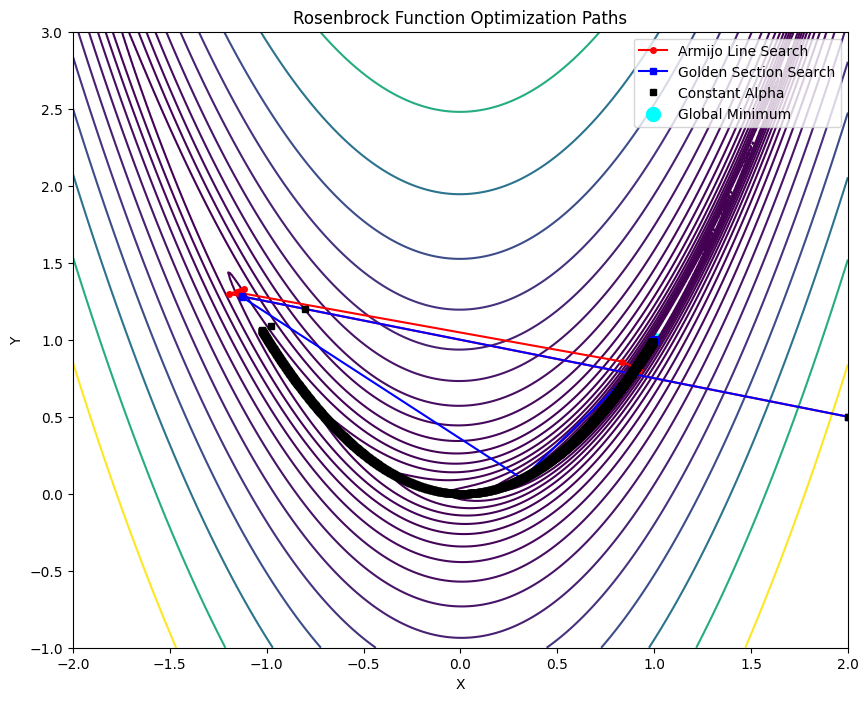

In [21]:
# Generate a contour plot of the Rosenbrock function
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
Z = rosenbrock_function([X, Y])

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')

# Convert paths to numpy arrays for plotting
armijo_line_path = np.array(armijo_line_path)
golden_section_path = np.array(golden_section_path)
constant_alpha_path = np.array(constant_alpha_path)

plt.plot(armijo_line_path[:, 0], armijo_line_path[:, 1], 'r-o', label='Armijo Line Search', markersize=4)
plt.plot(golden_section_path[:, 0], golden_section_path[:, 1], 'b-s', label='Golden Section Search', markersize=4)
plt.plot(constant_alpha_path[:, 0], constant_alpha_path[:, 1], 'ks', label='Constant Alpha', markersize=4)
plt.scatter(1, 1, color='cyan', s=100, label='Global Minimum')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Rosenbrock Function Optimization Paths')
plt.show()

Done by Karthik Raj (2022BCD0041)